In [22]:
from collections import Counter
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import umap
import umap.plot
import diptest
from sklearn.decomposition import PCA
from sklearn import datasets
from scipy.fft import dct
from scipy.spatial.distance import pdist, squareform
from tslearn.metrics import cdist_dtw

import sys
sys.path.append('../')
from src.dataset import Dataset
from src.condition import Condition
from src.representations import contour_array
from src.preprocess.synthesize import MarkovSynthesizer, subsample_clustered_contours
from helpers import cm2inch, title
from matplotlib.colors import LogNorm
matplotlib.style.use('styles.mplstyle')

import warnings
warnings.filterwarnings("ignore", category=Warning)

In [23]:
sims = {}
for dim in np.arange(1, 50, 5):
    condition = Condition('markov', 'pitch_centered', 'eucl', dimensionality=dim)
    sims[dim] = condition.similarities_sample()

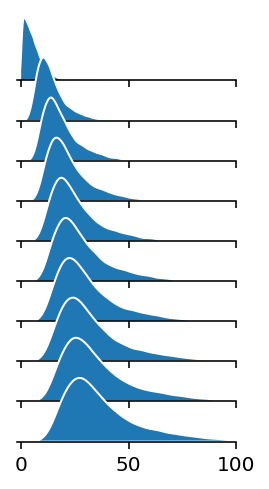

In [21]:
N = len(sims)
fig, axs = plt.subplots(N, figsize=cm2inch(5, N), sharex=True)
for ax, (dim, sim) in zip(axs, sims.items()):
    sns.kdeplot(sim, ax=ax, fill=True, lw=1, alpha=1, edgecolor='w', cut=True)
    sns.despine(left=True)
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.patch.set_alpha(0)
    ax.set_xlim(-2,100)

plt.gcf().subplots_adjust(hspace=-.4)

In [ ]:
N = len(sims)
fig, axs = plt.subplots(N, figsize=cm2inch(3, N), sharex=True)
for ax, (dim, sim) in zip(axs, sims.items()):
    sns.kdeplot(sim, ax=ax, fill=True, lw=1, alpha=1, edgecolor='w')
    sns.despine(left=True)
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.patch.set_alpha(0)

plt.gcf().subplots_adjust(hspace=-.4)